# **Techgig Code gladiator**

---



---



##Machine Learning - Online Hackathon
Conversion fraud in Digital Advertising

##With using click log data

##**Input important libraries**

In [6]:
import pandas as pd
import numpy as np # linear algebra
import time
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split


from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#**Reading training data**(with useful columns which dont have much null values)

In [7]:
dfo=pd.read_csv("/content/drive/MyDrive/New folder (7)/Training Data.csv",usecols=['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'])

In [8]:
dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [9]:
dfo.head()

,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,2.869316,5488088,49504155,1.0,2320,34,4140.0,6384,16,196058.0,129639.0,436.0,1806.0,202038.0,264496,280429.0,144.0,199452.0,1.0,348011.0,348022.0,348007.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,2.790000,5488773,49504157,1.0,15240,178,663.0,6384,16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,199452.0,1.0,348011.0,348024.0,348010.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,2.790000,5488088,49504160,1.0,2320,34,4144.0,6384,16,196058.0,129639.0,0.0,1812.0,202038.0,264503,172725.0,144.0,199452.0,1.0,348011.0,348027.0,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,2.790000,5488088,49504155,1.0,2320,34,4140.0,6384,16,196058.0,129639.0,10300.0,1815.0,202038.0,264496,136127.0,144.0,199452.0,1.0,348011.0,348023.0,348007.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,5614054,53607445,1.0,1,3296,NaN,3370,17,129311.0,129408.0,0.0,1818.0,0.0,264496,136127.0,144.0,360833.0,1.0,348011.0,348025.0,NaN,True


In [10]:
dfo.shape

(965, 28)

# Reading click log data(will use if it improves acuracy)

In [11]:
dfn=pd.read_csv("/content/drive/MyDrive/data/click_log.csv")

In [12]:
dfno=pd.read_csv("/content/drive/MyDrive/New folder (7)/click_log.csv")

In [13]:

'''list1=df.columns
list2=dfo.columns

list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)


intersection_as_list = list(intersection)

print(intersection_as_list)
'''

'list1=df.columns\nlist2=dfo.columns\n\nlist1_as_set = set(list1)\nintersection = list1_as_set.intersection(list2)\n\n\nintersection_as_list = list(intersection)\n\nprint(intersection_as_list)\n'

In [14]:
'''print(len(intersection_as_list))'''

'print(len(intersection_as_list))'

In [15]:
dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [16]:
len(dfo.columns)

28

In [17]:
dfn.head()

,imprid_cr,clmbuserid_cr,adslotdimid_cr,audiences_cr,allAudiences_cr,itemid_cr,algo_cr,clientid_cr,pubclientid_cr,itemcolumbiaid_cr,templateid_cr,clickbid_cr,position_cr,siteId_cr,pricingtype_cr,uuidSource_cr,countryDimId_cr,geoGrpDimId_cr,cityId_cr,cityGrpDimId_cr,stateId_cr,stateGrpDimId_cr,ispDimId_cr,osId_cr,osVerDimId_cr,modelDimId_cr,connTypeDimId_cr,browserId_cr,conversion_fraud
0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,13.10040,0,16,6.0,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,202038,264494,129639,NaN
1,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,4.58514,1,3290,16.0,1,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,202038,264496,129639,NaN
2,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,4.58514,159934117,3,16.0,1,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,202038,264496,129639,NaN
3,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,5.09460,1,3290,16.0,1,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,202038,264496,129639,NaN
4,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,4.58514,1,178,16.0,1,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,202038,264494,129639,NaN


In [18]:
dfno.head()

,Unnamed: 0,imprId,clmbUserId,adSltDimId,auds,allAuds,itemid,algo,advClientId,pubClientId,itmClmbLId,tmpltId,refUrl,clickBid,clickXForwardedFor,position,paid,siteId,callIdentifier,crtd,adslotRatio,pricingType,usrClusterId,siteClusterIds,ctxCatId,uuidSource,clickIp,clickGeoId,esi,adBlockerDetectionValueId,bundleId,impressionServedTimeStamp,appver,topic,ip,geoDimId,countryDimId,geoGrpDimId,cityDimId,cityGrpDimId,stateDimId,stateGrpDimId,ispDimId,osDimId,osVerDimId,devTypeDimId,vendorDimId,modelDimId,connTypeDimId,browserDimId,refClusterId,fraud,cpa,imprUserId,optout
0,0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,https%3A%2F%2Fnavbharattimes.indiatimes.com%2F...,13.10040,"103.212.158.109, 23.59.168.135, 124.124.201.229",0,1,16,B166b630l8021616125598649pzmfku8tlbktbqtjht65t,1.620000e+12,0.024,6.0,"333,734,333,729,333,000","128,527,333,734,333,000",205295-1,1,103.212.158.109,144.0,0.0,4,NaN,86,NaN,AdServe,122.176.114.222,144,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,196047.0,196460,202038,264494,129639,NaN,NaN,NaN,NaN,NaN
1,0,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,https%3A%2F%2Fwww.olx.in%2F,4.58514,"2409:4055:2e87:42e9:4dec:ae38:609e:8932, 49.44...",1,1,3290,q613U220R8891616126263941lu54rceq6xilidopi88m0k,1.620000e+12,1.000,16.0,NaN,NaN,205295-1,1,2409:4055:2e87:42e9:4dec:ae38:609e:8932,144.0,0.0,4,NaN,12,NaN,AdServe,2409:4055:2e87:42e9:4dec:ae38:609e:8932,144,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,196047.0,196460,202038,264496,129639,NaN,NaN,NaN,NaN,NaN
2,0,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,https%3A%2F%2Ftimesofindia.indiatimes.com%2F,4.58514,"2405:201:c00e:4087:5838:cbcb:8571:e8c0, 49.44....",159934117,1,3,E660S185t880,1.620000e+12,1.000,16.0,333496,"333,734,128,527,333,000",205295-1,1,2405:201:c00e:4087:5838:cbcb:8571:e8c0,144.0,0.0,4,NaN,24,NaN,AdServe,2405:201:c00e:4087:5838:cbcb:8571:e8c0,144,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,196047.0,196460,202038,264496,129639,NaN,NaN,NaN,NaN,NaN
3,0,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,https%3A%2F%2Fwww.olx.in%2F,5.09460,"106.213.27.57, 23.58.93.149, 23.45.91.49",1,1,3290,G168U347S671616094330288c73g9hzkscvsrdrr8eklu,1.620000e+12,1.000,16.0,"333,494,333,507",NaN,205295-1,1,106.213.27.57,144.0,0.0,4,NaN,3,NaN,AdServe,106.213.27.57,144,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,196047.0,196460,202038,264496,129639,NaN,NaN,NaN,NaN,NaN
4,0,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,4.58514,"103.48.46.23, 23.63.110.60, 23.57.76.153",1,1,178,B681N654k146,1.620000e+12,1.000,16.0,"333,493,333,494",NaN,205295-1,1,103.48.46.23,144.0,0.0,4,NaN,8,NaN,AdServe,103.48.46.23,144,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,196047.0,196460,202038,264494,129639,NaN,NaN,NaN,NaN,NaN


In [19]:
dfn.columns

Index(['imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'audiences_cr',
       'allAudiences_cr', 'itemid_cr', 'algo_cr', 'clientid_cr',
       'pubclientid_cr', 'itemcolumbiaid_cr', 'templateid_cr', 'clickbid_cr',
       'position_cr', 'siteId_cr', 'pricingtype_cr', 'uuidSource_cr',
       'countryDimId_cr', 'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr',
       'stateId_cr', 'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr',
       'osVerDimId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'browserId_cr',
       'conversion_fraud'],
      dtype='object')

In [20]:
dfno.columns

Index(['Unnamed: 0', 'imprId', 'clmbUserId', 'adSltDimId', 'auds', 'allAuds',
       'itemid', 'algo', 'advClientId', 'pubClientId', 'itmClmbLId', 'tmpltId',
       'refUrl', 'clickBid', 'clickXForwardedFor', 'position', 'paid',
       'siteId', 'callIdentifier', 'crtd', 'adslotRatio', 'pricingType',
       'usrClusterId', 'siteClusterIds', 'ctxCatId', 'uuidSource', 'clickIp',
       'clickGeoId', 'esi', 'adBlockerDetectionValueId', 'bundleId',
       'impressionServedTimeStamp', 'appver', 'topic', 'ip', 'geoDimId',
       'countryDimId', 'geoGrpDimId', 'cityDimId', 'cityGrpDimId',
       'stateDimId', 'stateGrpDimId', 'ispDimId', 'osDimId', 'osVerDimId',
       'devTypeDimId', 'vendorDimId', 'modelDimId', 'connTypeDimId',
       'browserDimId', 'refClusterId', 'fraud', 'cpa', 'imprUserId', 'optout'],
      dtype='object')

In [21]:
len(dfno.columns)

55

#Changing names of columns in click log

In [22]:
dict = {'clmbUserId': 'clmbuserid_cr',
        'imprId': 'imprid_cr',
        'adSltDimId': 'adslotdimid_cr','auds': 'audiences_cr',
        'allAuds': 'allAudiences_cr','itemid': 'itemid_cr',
        'algo': 'algo_cr','advClientId': 'clientid_cr',
        'pubClientId': 'pubclientid_cr',
        'itmClmbLId': 'itemcolumbiaid_cr','tmpltId':'templateid_cr',
        'clickBid': 'clickbid_cr','position': 'position_cr',
        'siteId': 'siteId_cr','pricingType': 'pricingtype_cr',
        'uuidSource': 'uuidSource_cr',
        'countryDimId': 'countryDimId_cr','geoGrpDimId': 'geoGrpDimId_cr',
        'cityDimId': 'cityId_cr','cityGrpDimId': 'cityGrpDimId_cr',
        'stateDimId': 'stateId_cr','stateGrpDimId': 'stateGrpDimId_cr',
        'ispDimId': 'ispDimId_cr',
        'osDimId': 'osId_cr','osVerDimId':'osVerDimId_cr',
        'modelDimId': 'modelDimId_cr','connTypeDimId': 'connTypeDimId_cr',
        'browserDimId': 'browserId_cr',"optout":'conversion_fraud'}
  
# call rename () method
dfno.rename(columns=dict,
          inplace=True)

In [23]:
dfno.columns
'''Index(['Unnamed: 0', 'imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr',
       'audiences_cr', 'allAudiences_cr', 'itemid_cr', 'algo_cr',
       'advClientId_cr', 'pubclientid_cr', 'itemcolumbiaid_cr',
       'templateid_cr', 'refUrl', 'clickbid_cr', 'clickXForwardedFor',
       'position_cr', 'paid', 'siteId_cr', 'callIdentifier', 'crtd',
       'adslotRatio', 'pricingtype_cr', 'usrClusterId', 'siteClusterIds',
       'ctxCatId', 'uuidSource_cr', 'clickIp', 'clickGeoId', 'esi',
       'adBlockerDetectionValueId', 'bundleId', 'impressionServedTimeStamp',
       'appver', 'topic', 'ip', 'geoDimId', 'countryDimId_cr',
       'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr', 'stateId_cr',
       'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr', 'osVerDimId_cr',
       'devTypeDimId', 'vendorDimId', 'modelDimId_cr', 'connTypeDimId_cr',
       'browserId_cr', 'refClusterId', 'fraud', 'cpa', 'imprUserId',
       'conversion_fraud'],
      dtype='object')'''

"Index(['Unnamed: 0', 'imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr',\n       'audiences_cr', 'allAudiences_cr', 'itemid_cr', 'algo_cr',\n       'advClientId_cr', 'pubclientid_cr', 'itemcolumbiaid_cr',\n       'templateid_cr', 'refUrl', 'clickbid_cr', 'clickXForwardedFor',\n       'position_cr', 'paid', 'siteId_cr', 'callIdentifier', 'crtd',\n       'adslotRatio', 'pricingtype_cr', 'usrClusterId', 'siteClusterIds',\n       'ctxCatId', 'uuidSource_cr', 'clickIp', 'clickGeoId', 'esi',\n       'adBlockerDetectionValueId', 'bundleId', 'impressionServedTimeStamp',\n       'appver', 'topic', 'ip', 'geoDimId', 'countryDimId_cr',\n       'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr', 'stateId_cr',\n       'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr', 'osVerDimId_cr',\n       'devTypeDimId', 'vendorDimId', 'modelDimId_cr', 'connTypeDimId_cr',\n       'browserId_cr', 'refClusterId', 'fraud', 'cpa', 'imprUserId',\n       'conversion_fraud'],\n      dtype='object')"

In [24]:
dfno = dfno[['imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'audiences_cr',
       'allAudiences_cr', 'itemid_cr', 'algo_cr', 'clientid_cr',
       'pubclientid_cr', 'itemcolumbiaid_cr', 'templateid_cr', 'clickbid_cr',
       'position_cr', 'siteId_cr', 'pricingtype_cr', 'uuidSource_cr',
       'countryDimId_cr', 'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr',
       'stateId_cr', 'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr',
       'osVerDimId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'browserId_cr',
       'conversion_fraud']]

In [25]:
len(dfn.columns)
len(dfno.columns)

29

## Reading test data(will make changes as the changes will be made in train data)


In [26]:
dftest=pd.read_csv("/content/drive/MyDrive/New folder (7)/Test Data.csv",usecols=['record_id', 'clientid_cr', 'clmbuserid_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr',
       'itemid_cr', 'position_cr', 'pubclientid_cr', 'siteId_cr',
       'templateid_cr', 'goalid_cr', 'pricingtype_cr', 'osId_cr',
       'browserId_cr', 'cityId_cr', 'stateId_cr', 'modelDimId_cr',
       'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'])

In [27]:
dftest.head()


,record_id,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494,265618,145,0,1,348012,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.1,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.1,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0


In [28]:
dftest.columns

Index(['record_id', 'clientid_cr', 'clmbuserid_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr',
       'itemid_cr', 'position_cr', 'pubclientid_cr', 'siteId_cr',
       'templateid_cr', 'goalid_cr', 'pricingtype_cr', 'osId_cr',
       'browserId_cr', 'cityId_cr', 'stateId_cr', 'modelDimId_cr',
       'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'],
      dtype='object')

In [29]:
len(dftest.columns)

28

Dropping Record id will add later to make submission file

In [30]:

dftest.drop(['record_id'], axis = 1)


,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494,265618,145,0,1,348012,NaN,NaN
1,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.10,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
2,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.10,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
3,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
4,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,75694,d7b5dfcb-b5ea-4862-8e47-5d775c568b00-6m6g,ff755b7d-00a4-426a-835c-ddf7f56af2b3-10o78,332783,20,3.10,5488773,49504155,181581299,2658,3,4376.0,6384,16,196058,129639,0,1808,202038,264494,266906,144,199452,1,348011,348020.0,NaN
451,75694,81b2e0f3-ba16-4f1d-ba54-cbb18ab54dca-1sjac,ff89a128-e0b9-4dcd-9a3f-257dff9e4dd5-10o78,129239,20,NaN,5488773,49504157,1,15240,178,663.0,6384,16,129300,129639,438,1818,202038,264494,133765,144,199522,1,348011,348025.0,348009.0
452,75694,9453538d-3c8a-4e9b-aff3-85a37b722429-1sj4s,ff9b716c-4cd1-44a7-9c21-19f6a73f31a2-10nqk,129237,37,3.10,5488773,49504154,1,15240,178,764.0,6384,16,196058,129639,10313,1817,202038,264494,147570,144,199452,1,348011,348024.0,348010.0
453,8895,8399fad4-a7de-49ec-9e58-d18530086e7d,ffc803da-ac63-4bf3-88fa-bd1d70bcdc39-10ntc,334760,2,NaN,5601460,52820721,3,76969,2923,1128.0,405,17,129311,129433,0,1803,0,264496,273302,144,360833,1,348011,348026.0,NaN


In [31]:
dfno.head()

,imprid_cr,clmbuserid_cr,adslotdimid_cr,audiences_cr,allAudiences_cr,itemid_cr,algo_cr,clientid_cr,pubclientid_cr,itemcolumbiaid_cr,templateid_cr,clickbid_cr,position_cr,siteId_cr,pricingtype_cr,uuidSource_cr,countryDimId_cr,geoGrpDimId_cr,cityId_cr,cityGrpDimId_cr,stateId_cr,stateGrpDimId_cr,ispDimId_cr,osId_cr,osVerDimId_cr,modelDimId_cr,connTypeDimId_cr,browserId_cr,conversion_fraud
0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,13.10040,0,16,6.0,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,202038,264494,129639,NaN
1,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,4.58514,1,3290,16.0,1,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,202038,264496,129639,NaN
2,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,4.58514,159934117,3,16.0,1,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,202038,264496,129639,NaN
3,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,5.09460,1,3290,16.0,1,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,202038,264496,129639,NaN
4,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,4.58514,1,178,16.0,1,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,202038,264494,129639,NaN


In [32]:

dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [33]:
len(dfo.columns)

28

In [34]:
dfno.columns

Index(['imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'audiences_cr',
       'allAudiences_cr', 'itemid_cr', 'algo_cr', 'clientid_cr',
       'pubclientid_cr', 'itemcolumbiaid_cr', 'templateid_cr', 'clickbid_cr',
       'position_cr', 'siteId_cr', 'pricingtype_cr', 'uuidSource_cr',
       'countryDimId_cr', 'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr',
       'stateId_cr', 'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr',
       'osVerDimId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'browserId_cr',
       'conversion_fraud'],
      dtype='object')

In [35]:
len(dfno.columns)

29

Selecting common columns

In [36]:
list1=dfno.columns
list2=dfo.columns

list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)


intersection_as_list = list(intersection)

print(intersection_as_list)


['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'templateid_cr', 'stateGrpDimId_cr', 'itemcolumbiaid_cr', 'ispDimId_cr', 'siteId_cr', 'modelDimId_cr', 'cityId_cr', 'clickbid_cr', 'uuidSource_cr', 'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr', 'pubclientid_cr', 'osId_cr', 'imprid_cr', 'osVerDimId_cr', 'itemid_cr', 'cityGrpDimId_cr', 'browserId_cr', 'connTypeDimId_cr', 'clientid_cr', 'conversion_fraud', 'algo_cr', 'clmbuserid_cr']


In [37]:
len(intersection_as_list)

27

In [38]:
dfno = dfn[intersection_as_list]

In [39]:
dfo=dfo[intersection_as_list]

In [40]:
dfno.head()

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,0,348011.0,1802.0,5627.0,348021.0,5618155,136127.0,16,202038,440.0,13.10040,1,6.0,144,207251,2310,196063.0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,199414.0,52696204,348005.0,129639,264494,330,NaN,18,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k
1,1,348011.0,1812.0,5167.0,348027.0,5617956,280429.0,3290,202038,10292.0,4.58514,1,16.0,144,356952,85030,196058.0,210a7e16-6783-46a5-9246-c635db091490-3qpg,199452.0,53622457,348005.0,129639,264496,330,NaN,18,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk
2,159934117,348011.0,129163.0,5657.0,348023.0,5617956,280429.0,3,202038,435.0,4.58514,1,16.0,144,350086,2658,196063.0,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,199414.0,53622457,348008.0,129639,264496,330,NaN,38,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao
3,1,348011.0,1804.0,5167.0,348027.0,5617956,136127.0,3290,202038,10255.0,5.09460,1,16.0,144,356952,85030,129300.0,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,199522.0,53622457,348005.0,129639,264496,330,NaN,38,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c
4,1,348011.0,1804.0,663.0,348027.0,5617956,132590.0,178,202038,0.0,4.58514,1,16.0,144,129239,15240,129300.0,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,199522.0,53622457,NaN,129639,264494,330,NaN,38,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg


In [41]:
dfo.head()

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,4140.0,348022.0,5488088,280429.0,34,202038.0,436.0,2.869316,1.0,16,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,348007.0,129639.0,264496,75694,True,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
1,1.0,348011.0,1817.0,663.0,348024.0,5488773,136127.0,178,202038.0,10314.0,2.790000,1.0,16,144.0,129239,15240,196058.0,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,199452.0,49504157,348010.0,129639.0,264496,75694,True,38.0,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg
2,1.0,348011.0,1812.0,4144.0,348027.0,5488088,172725.0,34,202038.0,0.0,2.790000,1.0,16,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,NaN,129639.0,264503,75694,True,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038.0,10300.0,2.790000,1.0,16,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,348007.0,129639.0,264496,75694,True,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,NaN,348025.0,5614054,136127.0,3296,0.0,0.0,NaN,1.0,17,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,NaN,129408.0,264496,30431,True,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts


In [42]:
dftest = dftest[['browserId_cr', 'ispDimId_cr', 'cityId_cr', 'stateGrpDimId_cr', 'stateId_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'cityGrpDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'clickbid_cr', 'pubclientid_cr', 'itemid_cr', 'templateid_cr', 'clientid_cr', 'osId_cr', 'pricingtype_cr', 'connTypeDimId_cr', 'modelDimId_cr', 'algo_cr', 'geoGrpDimId_cr', 'imprid_cr', 'siteId_cr', 'uuidSource_cr', 'position_cr']]



In [43]:
dftest.head()

,browserId_cr,ispDimId_cr,cityId_cr,stateGrpDimId_cr,stateId_cr,clmbuserid_cr,adslotdimid_cr,itemcolumbiaid_cr,cityGrpDimId_cr,countryDimId_cr,osVerDimId_cr,clickbid_cr,pubclientid_cr,itemid_cr,templateid_cr,clientid_cr,osId_cr,pricingtype_cr,connTypeDimId_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,imprid_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,NaN,2442,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,233531,5526656,NaN,145,0,NaN,2658,53184285,2946.0,82122,196061,16,264494,0,38,348012,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,3,1,3
1,129639,280429,10278,348020.0,1808,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,356952,5488773,348006.0,144,199414,3.1,85030,49504162,5167.0,75694,196063,16,264496,202038,20,348011,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,3290,1,1
2,129639,280429,10278,348020.0,1808,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,356952,5488088,348006.0,144,199414,3.1,85030,49504161,5167.0,75694,196063,16,264496,202038,18,348011,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,3290,1,1
3,129408,280429,10239,348025.0,1801,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,355768,5614054,348010.0,144,360833,NaN,1,53607445,NaN,30431,129311,17,264496,0,21,348011,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,3296,1,1
4,129408,280429,10239,348025.0,1801,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,355768,5614054,348010.0,144,360833,NaN,1,53607445,NaN,30431,129311,17,264496,0,21,348011,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,3296,1,1


# **Treating null values**

In [44]:
dfno.isnull().sum().sum()

608636

In [45]:
dfno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244864 entries, 0 to 244863
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   position_cr        244864 non-null  int64  
 1   geoGrpDimId_cr     233484 non-null  float64
 2   stateId_cr         242115 non-null  float64
 3   templateid_cr      222565 non-null  float64
 4   stateGrpDimId_cr   234919 non-null  float64
 5   itemcolumbiaid_cr  244864 non-null  int64  
 6   ispDimId_cr        244732 non-null  float64
 7   siteId_cr          244864 non-null  int64  
 8   modelDimId_cr      222249 non-null  object 
 9   cityId_cr          238775 non-null  float64
 10  clickbid_cr        141858 non-null  float64
 11  uuidSource_cr      236752 non-null  object 
 12  pricingtype_cr     222565 non-null  float64
 13  countryDimId_cr    244864 non-null  int64  
 14  adslotdimid_cr     244864 non-null  int64  
 15  pubclientid_cr     244864 non-null  int64  
 16  os

In [46]:
dfno = dfno[dfno['conversion_fraud'].notna()]

In [47]:
dfn

,imprid_cr,clmbuserid_cr,adslotdimid_cr,audiences_cr,allAudiences_cr,itemid_cr,algo_cr,clientid_cr,pubclientid_cr,itemcolumbiaid_cr,templateid_cr,clickbid_cr,position_cr,siteId_cr,pricingtype_cr,uuidSource_cr,countryDimId_cr,geoGrpDimId_cr,cityId_cr,cityGrpDimId_cr,stateId_cr,stateGrpDimId_cr,ispDimId_cr,osId_cr,osVerDimId_cr,modelDimId_cr,connTypeDimId_cr,browserId_cr,conversion_fraud
0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,13.10040,0,16,6.000,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,202038,264494,129639,NaN
1,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,4.58514,1,3290,16.000,1,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,202038,264496,129639,NaN
2,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,4.58514,159934117,3,16.000,1,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,202038,264496,129639,NaN
3,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,5.09460,1,3290,16.000,1,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,202038,264496,129639,NaN
4,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,4.58514,1,178,16.000,1,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,202038,264494,129639,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244859,c510e436-f20c-4c38-8093-23cf67aa7bea-1sjac,4b7f51b8-dbd9-47ac-889e-2fb754aaff78-10vj4,326703,NaN,9nj,53930227,38,86321,16153,5615623,5609.0,1.80000,14544,2721,1.000,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,129311.0,360956.0,0,264496,0,NaN
244860,20b55a65-b153-4542-80f1-1d76ae78866f-1sjio,0191cf3d-c1e4-4924-802c-ede0d8f2ebda-1sjio,341479,NaN,9nj,53930224,1,86321,80185,5615623,3446.0,1.80000,1,3041,1.000,2,144,348011.0,10314.0,348010.0,1817.0,348024.0,280429.0,129311.0,359921.0,0,264496,0,NaN
244861,b743ca09-56e0-47a7-89fd-a3ccaed28a46-1sjio,d436d8cc-de8a-46c5-98f4-debd41964d5c-6m3o,330294,8gv,"kmc,6hu,kmk,kmj,kml,mss,oy7,kmn,l7z,oy9,lo4,p1...",53930227,18,86321,69646,5615623,3446.0,1.80000,88,2688,2.686,2,144,348011.0,10295.0,NaN,1814.0,348026.0,136127.0,129311.0,360831.0,0,264496,129408,NaN
244862,4f7ad652-633c-44f7-8325-df426a85565a-62t8,f5f036d5-20d9-4923-ab36-8354b34418f4-10wj8,322157,"2vv,2vk,8gw","h9r,pd5,oy5,gk1,n78,lo4,apc,arh,7gh,5o2,75x,ga...",53930225,38,86321,16153,5615623,5609.0,1.80000,53243,2627,4.191,1,144,348011.0,0.0,NaN,1803.0,348026.0,187725.0,129311.0,359919.0,0,264496,129408,NaN


In [48]:
dfno.shape

(20687, 27)

In [49]:
dfo.shape

(965, 27)

In [50]:
dftest.shape

(455, 26)

#Values count of conversion frauds 

In [51]:

dfo["conversion_fraud"].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

In [52]:
pd.set_option('display.max_row',1000)


value counts in click log 

In [53]:

dfno["conversion_fraud"].value_counts()

TRUE                       1437
128515.0                    963
1                           848
True                        540
333496                      536
                           ... 
333,721,206,397,333,000       1
333,502,333,494,257,000       1
333,496,333,493               1
334,374,333,497,333,000       1
333,737,333,732,333,000       1
Name: conversion_fraud, Length: 2379, dtype: int64

Selecting only valid rows

In [54]:
dfno=dfno[(dfno["conversion_fraud"]=="TRUE")|(dfno["conversion_fraud"]==True)|(dfno["conversion_fraud"]==False)|(dfno["conversion_fraud"]=="FALSE")]

In [55]:
dfno["conversion_fraud"].value_counts()

TRUE    1437
True     540
Name: conversion_fraud, dtype: int64

In [56]:
dfno.columns

Index(['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'templateid_cr',
       'stateGrpDimId_cr', 'itemcolumbiaid_cr', 'ispDimId_cr', 'siteId_cr',
       'modelDimId_cr', 'cityId_cr', 'clickbid_cr', 'uuidSource_cr',
       'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr', 'pubclientid_cr',
       'osId_cr', 'imprid_cr', 'osVerDimId_cr', 'itemid_cr', 'cityGrpDimId_cr',
       'browserId_cr', 'connTypeDimId_cr', 'clientid_cr', 'conversion_fraud',
       'algo_cr', 'clmbuserid_cr'],
      dtype='object')

In [57]:
dfo.columns

Index(['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'templateid_cr',
       'stateGrpDimId_cr', 'itemcolumbiaid_cr', 'ispDimId_cr', 'siteId_cr',
       'modelDimId_cr', 'cityId_cr', 'clickbid_cr', 'uuidSource_cr',
       'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr', 'pubclientid_cr',
       'osId_cr', 'imprid_cr', 'osVerDimId_cr', 'itemid_cr', 'cityGrpDimId_cr',
       'browserId_cr', 'connTypeDimId_cr', 'clientid_cr', 'conversion_fraud',
       'algo_cr', 'clmbuserid_cr'],
      dtype='object')

## Concatinating training an click loh data

In [58]:
c = pd.concat([dfo,dfno],ignore_index=True)

In [59]:
c.shape

(2942, 27)

Dropping duplicates

In [60]:
c.drop_duplicates(keep = False, inplace = True)

In [61]:
c.shape

(2591, 27)

In [62]:
c

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,4140.0,348022.0,5488088,280429.0,34,202038,436.0,2.869316,1,16.0,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,348007.0,129639,264496,75694,True,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
2,1.0,348011.0,1812.0,4144.0,348027.0,5488088,172725.0,34,202038,0.0,2.790000,1,16.0,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,NaN,129639,264503,75694,True,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,10300.0,2.790000,1,16.0,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,348007.0,129639,264496,75694,True,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,NaN,348025.0,5614054,136127.0,3296,0,0.0,NaN,1,17.0,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,NaN,129408,264496,30431,True,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
6,2.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,439.0,3.100000,1,16.0,144.0,321300,2320,196058.0,0fe0e58a-4e84-43f7-97e5-703201ba01fe-1sk24,199452.0,49504155,348007.0,129639,264494,75694,True,38.0,10a967f6-c991-4f33-a212-9b42c8a60126-10w2k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,1.0,10295.0,129311.0,1128.0,360833.0,5620731,196041.0,2923,NaN,1814.0,1.523130,59.99.116.159,6.0,348011.0,334758,76969,196169.0,27342751-2906-451e-907c-4d771b3da678-3qs8,0.0,53930653,266906.0,NaN,NaN,86645,1,6.0,c615ad06-71a4-4e9f-a3c2-78e4928d447e-1sild
2938,1.0,0.0,129311.0,3430.0,360956.0,5620731,196041.0,1043,NaN,1818.0,1.523130,2401:4900:16c5:e0f9:1:1:b830:5ef2,6.0,348011.0,263957,16153,196182.0,f78799e5-7458-45af-87d1-f1e3fecb94c1-10nqk,0.0,53930653,136127.0,NaN,NaN,86645,1,6.0,cfafbc1b-2558-45df-b4ac-480b983699e2-10otg
2939,2.0,10314.0,129325.0,1128.0,359536.0,5620731,196041.0,2930,NaN,1817.0,1.523130,2405:201:600b:70a5:5d6f:bf51:68f3:c667,6.0,348011.0,335056,76969,196338.0,17700867-7674-49cf-b2e8-ffe9c2ccb45a-1sjd4,204084.0,53930653,280429.0,NaN,NaN,86645,1,6.0,6b81afb0-806d-443c-a5c2-9bbb6e47ca03-10ow8
2940,3.0,0.0,129325.0,901.0,359536.0,5620731,196041.0,2930,NaN,1803.0,1.523130,219.91.196.1,6.0,348011.0,335057,76969,196338.0,d84ed1a4-792a-4a52-935e-73ba5d71ee78-10ofk,204084.0,53930653,190004.0,NaN,NaN,86645,1,6.0,c5cbfabf-9a38-4620-ba6c-76e6c49a8d5f-10ow8


In [63]:
c

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,4140.0,348022.0,5488088,280429.0,34,202038,436.0,2.869316,1,16.0,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,348007.0,129639,264496,75694,True,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
2,1.0,348011.0,1812.0,4144.0,348027.0,5488088,172725.0,34,202038,0.0,2.790000,1,16.0,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,NaN,129639,264503,75694,True,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,10300.0,2.790000,1,16.0,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,348007.0,129639,264496,75694,True,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,NaN,348025.0,5614054,136127.0,3296,0,0.0,NaN,1,17.0,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,NaN,129408,264496,30431,True,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
6,2.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,439.0,3.100000,1,16.0,144.0,321300,2320,196058.0,0fe0e58a-4e84-43f7-97e5-703201ba01fe-1sk24,199452.0,49504155,348007.0,129639,264494,75694,True,38.0,10a967f6-c991-4f33-a212-9b42c8a60126-10w2k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,1.0,10295.0,129311.0,1128.0,360833.0,5620731,196041.0,2923,NaN,1814.0,1.523130,59.99.116.159,6.0,348011.0,334758,76969,196169.0,27342751-2906-451e-907c-4d771b3da678-3qs8,0.0,53930653,266906.0,NaN,NaN,86645,1,6.0,c615ad06-71a4-4e9f-a3c2-78e4928d447e-1sild
2938,1.0,0.0,129311.0,3430.0,360956.0,5620731,196041.0,1043,NaN,1818.0,1.523130,2401:4900:16c5:e0f9:1:1:b830:5ef2,6.0,348011.0,263957,16153,196182.0,f78799e5-7458-45af-87d1-f1e3fecb94c1-10nqk,0.0,53930653,136127.0,NaN,NaN,86645,1,6.0,cfafbc1b-2558-45df-b4ac-480b983699e2-10otg
2939,2.0,10314.0,129325.0,1128.0,359536.0,5620731,196041.0,2930,NaN,1817.0,1.523130,2405:201:600b:70a5:5d6f:bf51:68f3:c667,6.0,348011.0,335056,76969,196338.0,17700867-7674-49cf-b2e8-ffe9c2ccb45a-1sjd4,204084.0,53930653,280429.0,NaN,NaN,86645,1,6.0,6b81afb0-806d-443c-a5c2-9bbb6e47ca03-10ow8
2940,3.0,0.0,129325.0,901.0,359536.0,5620731,196041.0,2930,NaN,1803.0,1.523130,219.91.196.1,6.0,348011.0,335057,76969,196338.0,d84ed1a4-792a-4a52-935e-73ba5d71ee78-10ofk,204084.0,53930653,190004.0,NaN,NaN,86645,1,6.0,c5cbfabf-9a38-4620-ba6c-76e6c49a8d5f-10ow8


In [64]:
c.value_counts()

position_cr  geoGrpDimId_cr  stateId_cr  templateid_cr  stateGrpDimId_cr  itemcolumbiaid_cr  ispDimId_cr  siteId_cr  modelDimId_cr  cityId_cr  clickbid_cr  uuidSource_cr  pricingtype_cr  countryDimId_cr  adslotdimid_cr  pubclientid_cr  osId_cr   imprid_cr                                   osVerDimId_cr  itemid_cr  cityGrpDimId_cr  browserId_cr  connTypeDimId_cr  clientid_cr  conversion_fraud  algo_cr  clmbuserid_cr                             
193091838.0  348011.0        129163.0    5657.0         348023.0          5599296            266737.0     3          202038.0       10234.0    10.00        1.0            6.0             144.0            350086          2658            196058.0  3891c3d2-5ead-4759-ac98-06e452e9e2ac-62ys   199452.0       52820331   348008.0         129639.0      264494            85572        False             18.0     77012d09-1d5a-4880-8b02-2bbd681cfca8-1sjts    1
1.0          348011.0        129163.0    3347.0         348023.0          5576816            136127

# Arranging and formating the merged dataset
True=1
true=1
False=0

In [65]:
c["conversion_fraud"].value_counts()

TRUE     1195
False     827
True      569
Name: conversion_fraud, dtype: int64

In [66]:
c = c.replace({'conversion_fraud': {True:1,False:0,"TRUE":1}})

In [67]:
c.head()

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,4140.0,348022.0,5488088,280429.0,34,202038,436.0,2.869316,1,16.0,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,348007.0,129639,264496,75694,1,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
2,1.0,348011.0,1812.0,4144.0,348027.0,5488088,172725.0,34,202038,0.0,2.790000,1,16.0,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,NaN,129639,264503,75694,1,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,10300.0,2.790000,1,16.0,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,348007.0,129639,264496,75694,1,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,NaN,348025.0,5614054,136127.0,3296,0,0.0,NaN,1,17.0,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,NaN,129408,264496,30431,1,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
6,2.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038,439.0,3.100000,1,16.0,144.0,321300,2320,196058.0,0fe0e58a-4e84-43f7-97e5-703201ba01fe-1sk24,199452.0,49504155,348007.0,129639,264494,75694,1,38.0,10a967f6-c991-4f33-a212-9b42c8a60126-10w2k


New value counts

In [68]:
c["conversion_fraud"].value_counts()

1    1764
0     827
Name: conversion_fraud, dtype: int64

In [69]:
c.isnull().sum()

position_cr           13
geoGrpDimId_cr        13
stateId_cr            15
templateid_cr        101
stateGrpDimId_cr     139
itemcolumbiaid_cr      0
ispDimId_cr           13
siteId_cr              0
modelDimId_cr         94
cityId_cr             13
clickbid_cr          926
uuidSource_cr         14
pricingtype_cr         1
countryDimId_cr       13
adslotdimid_cr         0
pubclientid_cr         0
osId_cr               14
imprid_cr              0
osVerDimId_cr         14
itemid_cr              0
cityGrpDimId_cr      698
browserId_cr         284
connTypeDimId_cr      93
clientid_cr            0
conversion_fraud       0
algo_cr               13
clmbuserid_cr          0
dtype: int64

In [70]:
dftest.isnull().sum()

browserId_cr           0
ispDimId_cr            0
cityId_cr              0
stateGrpDimId_cr      42
stateId_cr             0
clmbuserid_cr          0
adslotdimid_cr         0
itemcolumbiaid_cr      0
cityGrpDimId_cr      153
countryDimId_cr        0
osVerDimId_cr          0
clickbid_cr          150
pubclientid_cr         0
itemid_cr              0
templateid_cr         41
clientid_cr            0
osId_cr                0
pricingtype_cr         0
connTypeDimId_cr       0
modelDimId_cr          0
algo_cr                0
geoGrpDimId_cr         0
imprid_cr              0
siteId_cr              0
uuidSource_cr          0
position_cr            0
dtype: int64

Dropping non important columns

In [71]:
c=c.drop(['stateGrpDimId_cr',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)

In [72]:
'''dfno=dfno.drop(['stateGrpDimId_cr',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)'''

'dfno=dfno.drop([\'stateGrpDimId_cr\',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)'

In [73]:
dftest=dftest.drop(['stateGrpDimId_cr',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)

In [74]:
c.isnull().sum()

position_cr           13
geoGrpDimId_cr        13
stateId_cr            15
itemcolumbiaid_cr      0
ispDimId_cr           13
siteId_cr              0
modelDimId_cr         94
cityId_cr             13
uuidSource_cr         14
pricingtype_cr         1
countryDimId_cr       13
adslotdimid_cr         0
pubclientid_cr         0
osId_cr               14
imprid_cr              0
osVerDimId_cr         14
itemid_cr              0
browserId_cr         284
connTypeDimId_cr      93
clientid_cr            0
conversion_fraud       0
algo_cr               13
clmbuserid_cr          0
dtype: int64

In [75]:
dftest.isnull().sum()

browserId_cr         0
ispDimId_cr          0
cityId_cr            0
stateId_cr           0
clmbuserid_cr        0
adslotdimid_cr       0
itemcolumbiaid_cr    0
countryDimId_cr      0
osVerDimId_cr        0
pubclientid_cr       0
itemid_cr            0
clientid_cr          0
osId_cr              0
pricingtype_cr       0
connTypeDimId_cr     0
modelDimId_cr        0
algo_cr              0
geoGrpDimId_cr       0
imprid_cr            0
siteId_cr            0
uuidSource_cr        0
position_cr          0
dtype: int64

In [76]:
c= c.dropna()
dfo.head()

,position_cr,geoGrpDimId_cr,stateId_cr,templateid_cr,stateGrpDimId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,clickbid_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,cityGrpDimId_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,4140.0,348022.0,5488088,280429.0,34,202038.0,436.0,2.869316,1.0,16,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,348007.0,129639.0,264496,75694,True,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
1,1.0,348011.0,1817.0,663.0,348024.0,5488773,136127.0,178,202038.0,10314.0,2.790000,1.0,16,144.0,129239,15240,196058.0,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,199452.0,49504157,348010.0,129639.0,264496,75694,True,38.0,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg
2,1.0,348011.0,1812.0,4144.0,348027.0,5488088,172725.0,34,202038.0,0.0,2.790000,1.0,16,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,NaN,129639.0,264503,75694,True,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,4140.0,348023.0,5488088,136127.0,34,202038.0,10300.0,2.790000,1.0,16,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,348007.0,129639.0,264496,75694,True,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,NaN,348025.0,5614054,136127.0,3296,0.0,0.0,NaN,1.0,17,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,NaN,129408.0,264496,30431,True,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts


In [77]:
c.isnull().sum()

position_cr          0
geoGrpDimId_cr       0
stateId_cr           0
itemcolumbiaid_cr    0
ispDimId_cr          0
siteId_cr            0
modelDimId_cr        0
cityId_cr            0
uuidSource_cr        0
pricingtype_cr       0
countryDimId_cr      0
adslotdimid_cr       0
pubclientid_cr       0
osId_cr              0
imprid_cr            0
osVerDimId_cr        0
itemid_cr            0
browserId_cr         0
connTypeDimId_cr     0
clientid_cr          0
conversion_fraud     0
algo_cr              0
clmbuserid_cr        0
dtype: int64

In [78]:
c.shape

(2307, 23)

In [79]:
dftest.shape

(455, 22)

### Correlation MAtrix

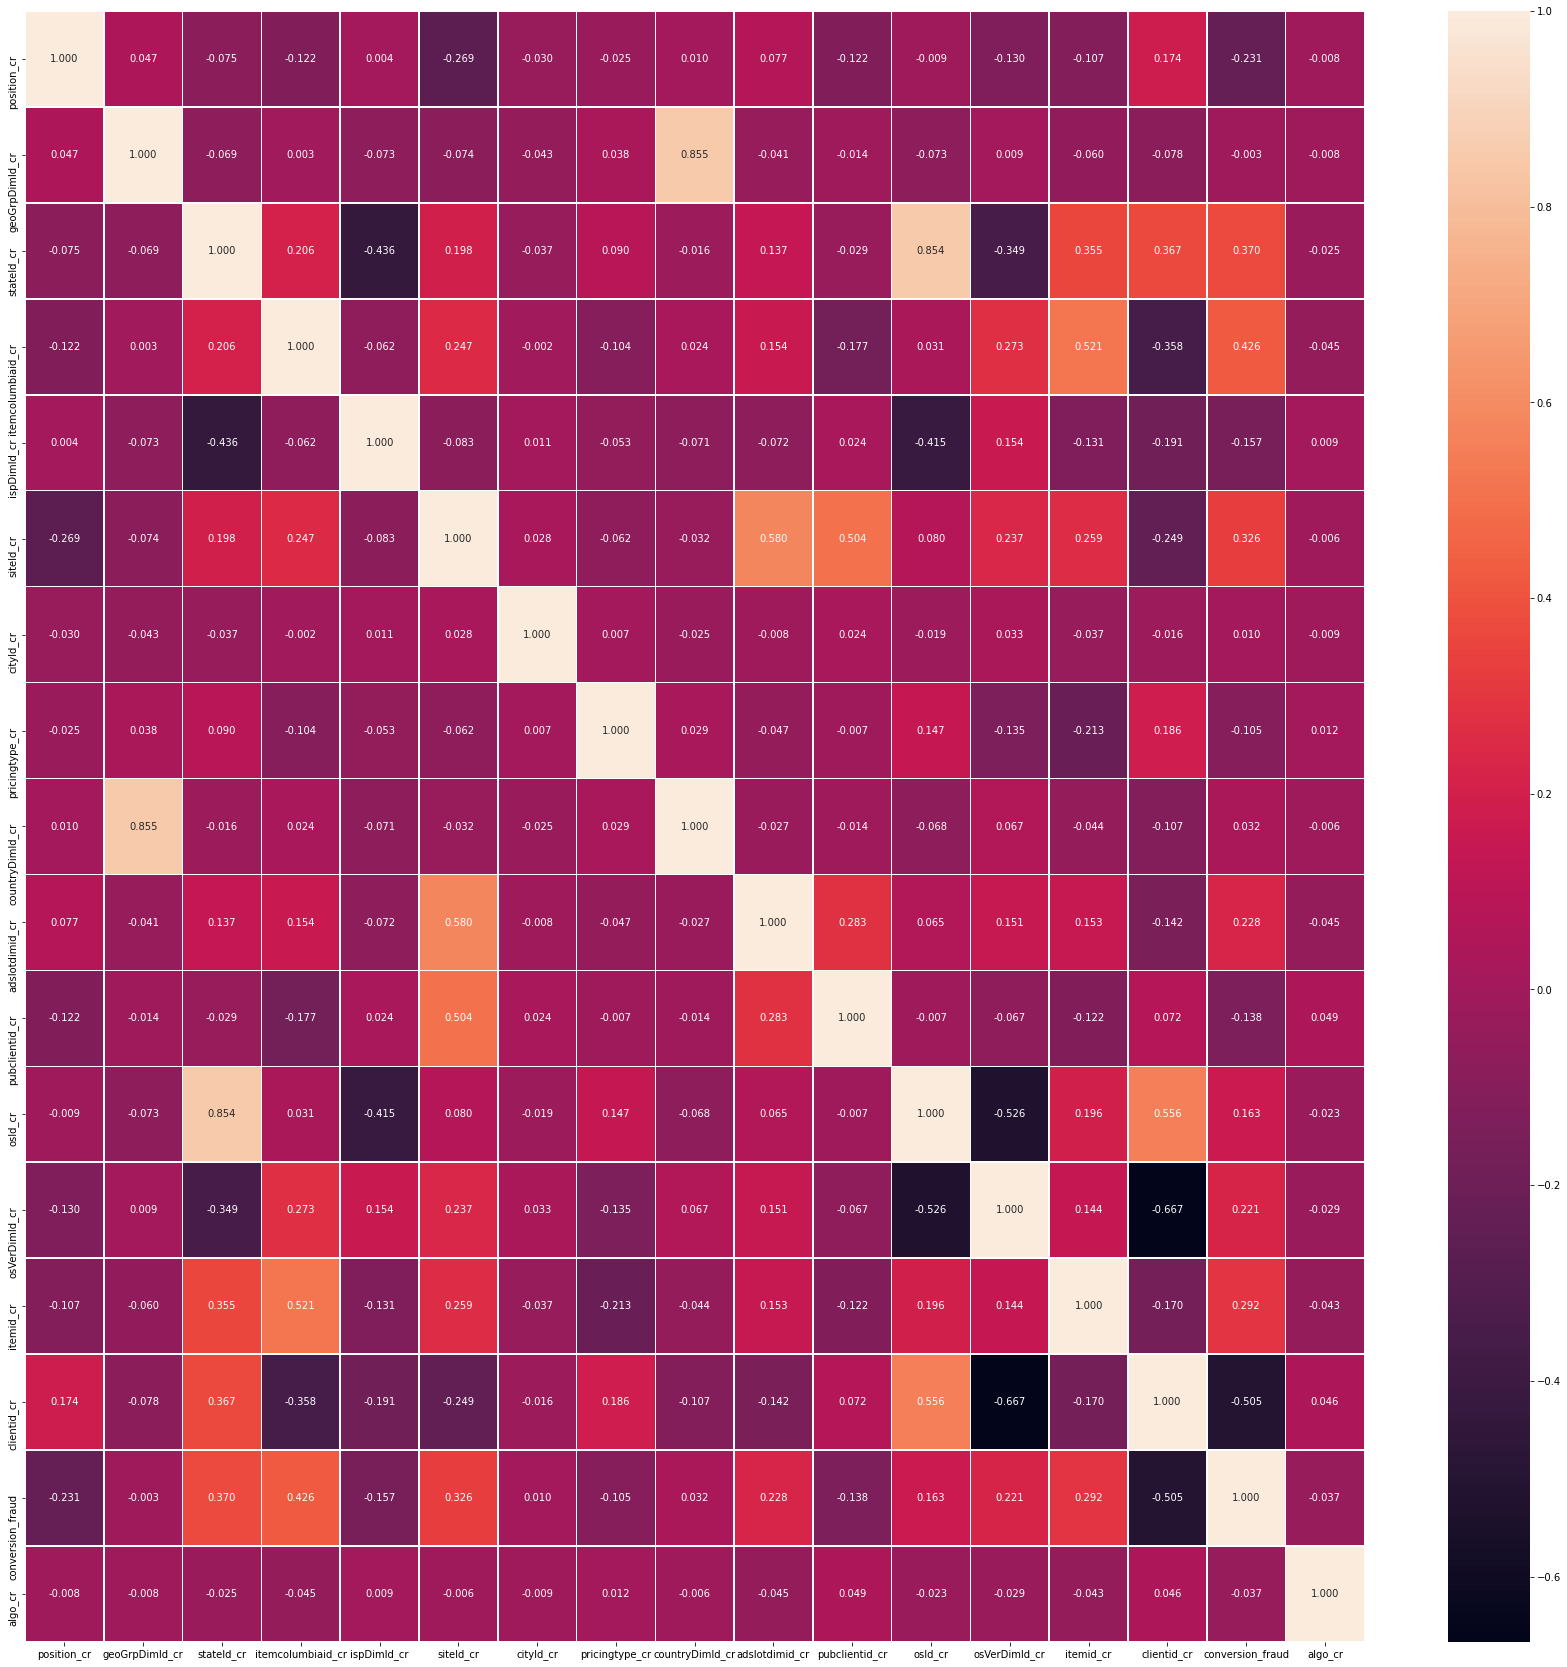

In [80]:
corr = c.corr()
f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [81]:
c.head()

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,imprid_cr,osVerDimId_cr,itemid_cr,browserId_cr,connTypeDimId_cr,clientid_cr,conversion_fraud,algo_cr,clmbuserid_cr
0,1.0,348011.0,1806.0,5488088,280429.0,34,202038,436.0,1,16.0,144.0,321300,2320,196058.0,01649076-c77f-4d70-afc8-213535427147-1sjd4,199452.0,49504155,129639,264496,75694,1,38.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
2,1.0,348011.0,1812.0,5488088,172725.0,34,202038,0.0,1,16.0,144.0,321554,2320,196058.0,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,199452.0,49504160,129639,264503,75694,1,21.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3,1.0,348011.0,1815.0,5488088,136127.0,34,202038,10300.0,1,16.0,144.0,321300,2320,196058.0,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,199452.0,49504155,129639,264496,75694,1,38.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk
4,1.0,348011.0,1818.0,5614054,136127.0,3296,0,0.0,1,17.0,144.0,355768,1,129311.0,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,360833.0,53607445,129408,264496,30431,1,21.0,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
6,2.0,348011.0,1815.0,5488088,136127.0,34,202038,439.0,1,16.0,144.0,321300,2320,196058.0,0fe0e58a-4e84-43f7-97e5-703201ba01fe-1sk24,199452.0,49504155,129639,264494,75694,1,38.0,10a967f6-c991-4f33-a212-9b42c8a60126-10w2k


In [82]:
c=c.drop(["clmbuserid_cr","imprid_cr","connTypeDimId_cr"], axis = 1)

In [83]:
dftest=dftest.drop(["clmbuserid_cr","imprid_cr","connTypeDimId_cr"], axis = 1)

In [84]:
c

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,osVerDimId_cr,itemid_cr,browserId_cr,clientid_cr,conversion_fraud,algo_cr
0,1.0,348011.0,1806.0,5488088,280429.0,34,202038,436.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0
2,1.0,348011.0,1812.0,5488088,172725.0,34,202038,0.0,1,16.0,144.0,321554,2320,196058.0,199452.0,49504160,129639,75694,1,21.0
3,1.0,348011.0,1815.0,5488088,136127.0,34,202038,10300.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0
4,1.0,348011.0,1818.0,5614054,136127.0,3296,0,0.0,1,17.0,144.0,355768,1,129311.0,360833.0,53607445,129408,30431,1,21.0
6,2.0,348011.0,1815.0,5488088,136127.0,34,202038,439.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,3037.0,348011.0,348025.0,5615451,129311.0,2627,264496,10235.0,1,17.0,144.0,322158,16153,206071.0,196041.0,53622312,348009,67368,1,18.0
2851,0.0,348011.0,348024.0,5612682,196061.0,16,264496,10282.0,1,16.0,144.0,207251,2310,0.0,196047.0,53622313,348010,67368,1,18.0
2855,68652.0,348011.0,348024.0,5615451,129311.0,2627,264496,10313.0,1,17.0,144.0,322158,16153,360956.0,196041.0,53622312,348010,67368,1,18.0
2856,11365.0,348011.0,348024.0,5615451,129311.0,2627,264496,10308.0,1,17.0,144.0,322158,16153,360956.0,196041.0,53622312,348010,67368,1,18.0


# **Using Tsne ,PCA and truncated Svd to visualize data**

In [92]:
import time

In [93]:
new_df=c
X = new_df.drop('conversion_fraud', axis=1)
y =new_df['conversion_fraud']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.8e+01 s
PCA took 0.053 s
Truncated SVD took 0.028 s


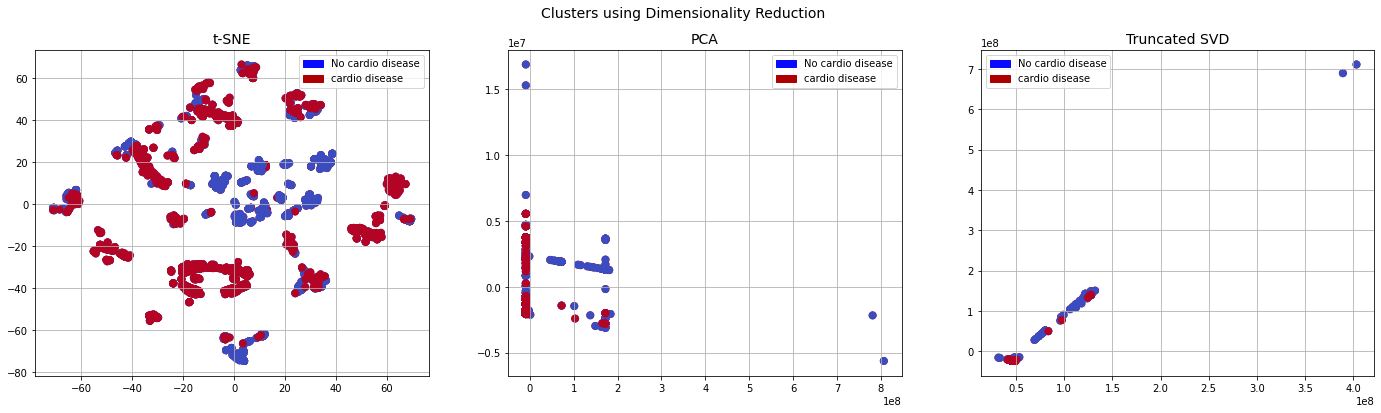

In [94]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No cardio disease')
red_patch = mpatches.Patch(color='#AF0000', label='cardio disease')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='no cardio disease', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

In [95]:
c.shape

(2307, 20)

In [96]:
c.head()

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,osVerDimId_cr,itemid_cr,browserId_cr,clientid_cr,conversion_fraud,algo_cr
0,1.0,348011.0,1806.0,5488088,280429.0,34,202038,436.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0
2,1.0,348011.0,1812.0,5488088,172725.0,34,202038,0.0,1,16.0,144.0,321554,2320,196058.0,199452.0,49504160,129639,75694,1,21.0
3,1.0,348011.0,1815.0,5488088,136127.0,34,202038,10300.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0
4,1.0,348011.0,1818.0,5614054,136127.0,3296,0,0.0,1,17.0,144.0,355768,1,129311.0,360833.0,53607445,129408,30431,1,21.0
6,2.0,348011.0,1815.0,5488088,136127.0,34,202038,439.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,1,38.0


In [97]:
X = c.drop(columns=['conversion_fraud'], axis=1)
y =c['conversion_fraud']

In [98]:
c.dtypes

position_cr          float64
geoGrpDimId_cr       float64
stateId_cr           float64
itemcolumbiaid_cr      int64
ispDimId_cr          float64
siteId_cr              int64
modelDimId_cr         object
cityId_cr            float64
uuidSource_cr         object
pricingtype_cr       float64
countryDimId_cr      float64
adslotdimid_cr         int64
pubclientid_cr         int64
osId_cr              float64
osVerDimId_cr        float64
itemid_cr              int64
browserId_cr          object
clientid_cr            int64
conversion_fraud       int64
algo_cr              float64
dtype: object

In [99]:
c.isna().sum()

position_cr          0
geoGrpDimId_cr       0
stateId_cr           0
itemcolumbiaid_cr    0
ispDimId_cr          0
siteId_cr            0
modelDimId_cr        0
cityId_cr            0
uuidSource_cr        0
pricingtype_cr       0
countryDimId_cr      0
adslotdimid_cr       0
pubclientid_cr       0
osId_cr              0
osVerDimId_cr        0
itemid_cr            0
browserId_cr         0
clientid_cr          0
conversion_fraud     0
algo_cr              0
dtype: int64

#Preparing Train data

In [100]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X.shape

(2307, 19)

Models without Hyperparameter tuning

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [103]:
# Let's implement simple classifiers

ran = RandomForestClassifier(n_estimators=100)

naive = GaussianNB()


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random forest" : ran,
    "Naive bayes" : naive}

In [104]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 87.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 90.0 % accuracy score
Classifiers:  SVC Has a training score of 69.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 94.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 97.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 85.0 % accuracy score


Accuracies of models(Random forest showing good results)

In [105]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X_train, y=y_train, cv=10)

Cross val accuracy of knn and random forest

In [106]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.9707344300822562
Random Forest Standart Deviation:  0.012142709398723629
KNN Average accuracy:  0.9019036427732081
KNN Standart Deviation:  0.023900451273341203


Confusion matrix function

In [107]:

from sklearn.metrics import confusion_matrix
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Decision Tree with Grid search

In [108]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
    #fit model to data
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [109]:
ydt=dtree_gscv.predict(X_test)

In [110]:
score = accuracy_score(y_test, ydt)
score

0.9567099567099567

Confusion matrix, without normalization
[[153   8]
 [ 12 289]]


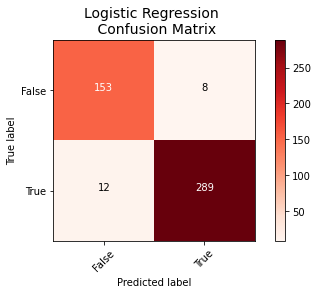

In [111]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ydt)
plot_confusion_matrix(cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

Log regression with Grid search

In [112]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,cv=5)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [113]:
ylog=log_reg.predict(X_test)

In [114]:
score = accuracy_score(y_test, ylog)
score

0.8809523809523809

Confusion matrix, without normalization
[[125  36]
 [ 19 282]]


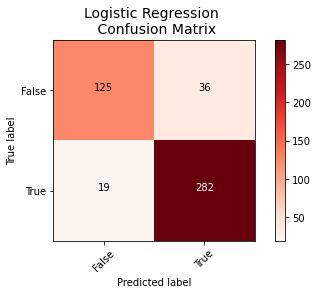

In [115]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ylog)
plot_confusion_matrix(cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

In [116]:
print('LOG REG Classifier:')
print(classification_report(y_test,ylog))

LOG REG Classifier:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       161
           1       0.89      0.94      0.91       301

    accuracy                           0.88       462
   macro avg       0.88      0.86      0.87       462
weighted avg       0.88      0.88      0.88       462



Knn with Grid Search

In [117]:
knears_params = {"n_neighbors": [1,3,5,7,9,11,13,21,27,33,41,51,99], 'algorithm': ['auto']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [118]:
yknn=knears_neighbors.predict(X_test)

In [119]:
score = accuracy_score(y_test, yknn)
score

0.8939393939393939

Confusion matrix, without normalization
[[133  28]
 [ 21 280]]


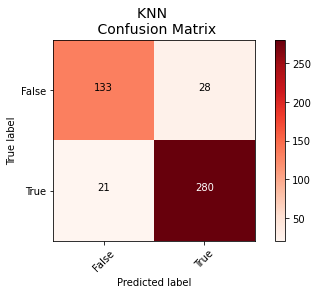

In [120]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yknn)
plot_confusion_matrix(cm, labels, title="KNN \n Confusion Matrix", cmap=plt.cm.Reds)

In [121]:
print('knn Classifier:')
print(classification_report(y_test,yknn))

knn Classifier:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       161
           1       0.91      0.93      0.92       301

    accuracy                           0.89       462
   macro avg       0.89      0.88      0.88       462
weighted avg       0.89      0.89      0.89       462



Random forest with grid search

In [122]:

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
model = GridSearchCV(RandomForestClassifier(max_features='sqrt'),param_grid,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9926538866304865


In [123]:
randomf = model.best_estimator_
randomf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:

yrf=randomf.predict(X_test)

Confusion matrix, without normalization
[[155   6]
 [  8 293]]


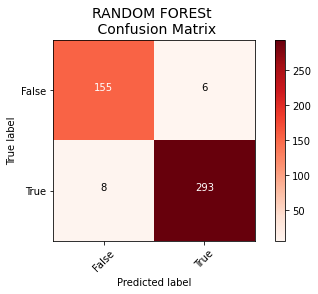

In [125]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yrf)
plot_confusion_matrix(cm, labels, title="RANDOM FORESt \n Confusion Matrix", cmap=plt.cm.Reds)

In [126]:
print('rf Classifier:')
print(classification_report(y_test,yrf))

rf Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       161
           1       0.98      0.97      0.98       301

    accuracy                           0.97       462
   macro avg       0.97      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462



CAT boost classifier

In [127]:
!pip install catboost

     |████████████████████████████████| 69.2MB 55kB/s 


In [128]:
import catboost
clfcb = catboost.CatBoostClassifier(
            n_estimators = 4000,
            task_type = 'CPU',
            one_hot_max_size = 2,
            random_seed = 31,
            loss_function = 'MultiClass',
            learning_rate = 0.8,
            max_depth = 6,
            colsample_bylevel = 0.5,
            bagging_temperature = 28.635664398579774,
            random_strength = 100.0,
            reg_lambda = 100.0,
            early_stopping_rounds=500,
    )

In [129]:
clfcb.fit(X_train, y_train)

0:	learn: 0.4478366	total: 49.8ms	remaining: 3m 19s
1:	learn: 0.3934006	total: 53.6ms	remaining: 1m 47s
2:	learn: 0.3563765	total: 57.1ms	remaining: 1m 16s
3:	learn: 0.3287155	total: 60.3ms	remaining: 1m
4:	learn: 0.3144483	total: 63.9ms	remaining: 51.1s
5:	learn: 0.2902437	total: 66.4ms	remaining: 44.2s
6:	learn: 0.2768655	total: 69.6ms	remaining: 39.7s
7:	learn: 0.2552554	total: 72.9ms	remaining: 36.4s
8:	learn: 0.2448201	total: 76.1ms	remaining: 33.7s
9:	learn: 0.2357909	total: 79.3ms	remaining: 31.6s
10:	learn: 0.2322434	total: 82ms	remaining: 29.8s
11:	learn: 0.2291146	total: 85.1ms	remaining: 28.3s
12:	learn: 0.2246568	total: 87.5ms	remaining: 26.8s
13:	learn: 0.2218426	total: 90.1ms	remaining: 25.7s
14:	learn: 0.2177702	total: 92.4ms	remaining: 24.6s
15:	learn: 0.2103588	total: 95.2ms	remaining: 23.7s
16:	learn: 0.2079964	total: 98.2ms	remaining: 23s
17:	learn: 0.2041929	total: 101ms	remaining: 22.4s
18:	learn: 0.2024202	total: 104ms	remaining: 21.8s
19:	learn: 0.1989071	total: 

In [130]:

print(clfcb.score(X_test, y_test))

0.961038961038961


In [131]:

ycat=clfcb.predict(X_test)

Confusion matrix, without normalization
[[151  10]
 [  8 293]]


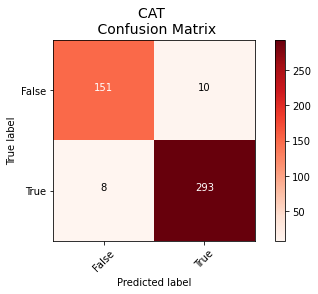

In [132]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ycat)
plot_confusion_matrix(cm, labels, title="CAT \n Confusion Matrix", cmap=plt.cm.Reds)

In [133]:
print('cat Classifier:')
print(classification_report(y_test,ycat))

cat Classifier:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       161
           1       0.97      0.97      0.97       301

    accuracy                           0.96       462
   macro avg       0.96      0.96      0.96       462
weighted avg       0.96      0.96      0.96       462



In [134]:
X.head()

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,osVerDimId_cr,itemid_cr,browserId_cr,clientid_cr,algo_cr
0,1.0,348011.0,1806.0,5488088,280429.0,34,202038,436.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0
2,1.0,348011.0,1812.0,5488088,172725.0,34,202038,0.0,1,16.0,144.0,321554,2320,196058.0,199452.0,49504160,129639,75694,21.0
3,1.0,348011.0,1815.0,5488088,136127.0,34,202038,10300.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0
4,1.0,348011.0,1818.0,5614054,136127.0,3296,0,0.0,1,17.0,144.0,355768,1,129311.0,360833.0,53607445,129408,30431,21.0
6,2.0,348011.0,1815.0,5488088,136127.0,34,202038,439.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0


In [135]:
print(X.dtypes)

position_cr          float64
geoGrpDimId_cr       float64
stateId_cr           float64
itemcolumbiaid_cr      int64
ispDimId_cr          float64
siteId_cr              int64
modelDimId_cr         object
cityId_cr            float64
uuidSource_cr         object
pricingtype_cr       float64
countryDimId_cr      float64
adslotdimid_cr         int64
pubclientid_cr         int64
osId_cr              float64
osVerDimId_cr        float64
itemid_cr              int64
browserId_cr          object
clientid_cr            int64
algo_cr              float64
dtype: object


XGBOOST

In [136]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
c['uuidSource_cr'] =lbl.fit_transform(c['uuidSource_cr'].astype(float))
c['browserId_cr'] =lbl.fit_transform(c['browserId_cr'].astype(float))
c['modelDimId_cr'] = lbl.fit_transform(c['modelDimId_cr'].astype(float))

In [137]:
XX= c.drop(columns=['conversion_fraud'], axis=1)
yy =c['conversion_fraud']

In [138]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_trainx, X_testx, y_trainy, y_testy = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [139]:
from xgboost import XGBClassifier
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
clf1 = XGBClassifier(booster='gbtree')
model=GridSearchCV(estimator = clf1,param_grid=param_grid ,cv = 3,scoring='roc_auc',return_train_score=True)
model.fit(X_trainx,y_trainy)
print('optimal depth : ',model.best_estimator_.max_depth)
print('optimal n_estimator : ',model.best_estimator_.n_estimators)

#optimal depth :  50
#optimal n_estimator :  40

optimal depth :  5
optimal n_estimator :  80


In [140]:
xgb= model.best_estimator_
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [141]:
X.shape

(2307, 19)

In [142]:
xgb.fit(X_trainx,y_trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [143]:
yxg=xgb.predict(X_testx)

In [144]:
score = accuracy_score(y_testy, yxg)
score

0.9718614718614719

Confusion matrix, without normalization
[[156   5]
 [  8 293]]


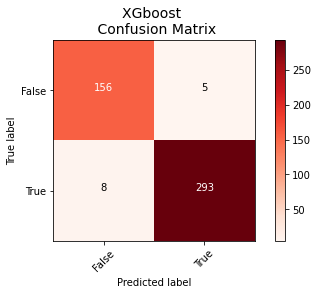

In [145]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yxg)
plot_confusion_matrix(cm, labels, title="XGboost \n Confusion Matrix", cmap=plt.cm.Reds)

In [146]:

print('xgboost Classifier:')
print(classification_report(y_test,yxg))

xgboost Classifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       161
           1       0.98      0.97      0.98       301

    accuracy                           0.97       462
   macro avg       0.97      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462



In [147]:
dftest.head()

,browserId_cr,ispDimId_cr,cityId_cr,stateId_cr,adslotdimid_cr,itemcolumbiaid_cr,countryDimId_cr,osVerDimId_cr,pubclientid_cr,itemid_cr,clientid_cr,osId_cr,pricingtype_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,2442,233531,5526656,145,0,2658,53184285,82122,196061,16,0,38,348012,3,1,3
1,129639,280429,10278,1808,356952,5488773,144,199414,85030,49504162,75694,196063,16,202038,20,348011,3290,1,1
2,129639,280429,10278,1808,356952,5488088,144,199414,85030,49504161,75694,196063,16,202038,18,348011,3290,1,1
3,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1
4,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1


In [148]:
X.head()

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,osVerDimId_cr,itemid_cr,browserId_cr,clientid_cr,algo_cr
0,1.0,348011.0,1806.0,5488088,280429.0,34,202038,436.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0
2,1.0,348011.0,1812.0,5488088,172725.0,34,202038,0.0,1,16.0,144.0,321554,2320,196058.0,199452.0,49504160,129639,75694,21.0
3,1.0,348011.0,1815.0,5488088,136127.0,34,202038,10300.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0
4,1.0,348011.0,1818.0,5614054,136127.0,3296,0,0.0,1,17.0,144.0,355768,1,129311.0,360833.0,53607445,129408,30431,21.0
6,2.0,348011.0,1815.0,5488088,136127.0,34,202038,439.0,1,16.0,144.0,321300,2320,196058.0,199452.0,49504155,129639,75694,38.0


In [149]:
X.columns

Index(['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'itemcolumbiaid_cr',
       'ispDimId_cr', 'siteId_cr', 'modelDimId_cr', 'cityId_cr',
       'uuidSource_cr', 'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr',
       'pubclientid_cr', 'osId_cr', 'osVerDimId_cr', 'itemid_cr',
       'browserId_cr', 'clientid_cr', 'algo_cr'],
      dtype='object')

# We will be using random forest due to high accuracy,precision,recall and f1 score

In [150]:
dffo=pd.read_csv("/content/drive/MyDrive/data/Test Data.csv")

In [151]:
dffo.head()

,record_id,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494.0,265618,145,0,1,348012,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.1,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.1,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0


In [152]:
dff=pd.read_csv("/content/drive/MyDrive/New folder (7)/Test Data.csv")

In [153]:
dff.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,NaN,0,1,348012,NaN,196047.0,NaN,42860785.0,1.0,NaN,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [154]:
n=dff["record_id"]

In [155]:
dftest.head()

,browserId_cr,ispDimId_cr,cityId_cr,stateId_cr,adslotdimid_cr,itemcolumbiaid_cr,countryDimId_cr,osVerDimId_cr,pubclientid_cr,itemid_cr,clientid_cr,osId_cr,pricingtype_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,2442,233531,5526656,145,0,2658,53184285,82122,196061,16,0,38,348012,3,1,3
1,129639,280429,10278,1808,356952,5488773,144,199414,85030,49504162,75694,196063,16,202038,20,348011,3290,1,1
2,129639,280429,10278,1808,356952,5488088,144,199414,85030,49504161,75694,196063,16,202038,18,348011,3290,1,1
3,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1
4,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1


In [164]:
X.columns

Index(['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'itemcolumbiaid_cr',
       'ispDimId_cr', 'siteId_cr', 'modelDimId_cr', 'cityId_cr',
       'uuidSource_cr', 'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr',
       'pubclientid_cr', 'osId_cr', 'osVerDimId_cr', 'itemid_cr',
       'browserId_cr', 'clientid_cr', 'algo_cr'],
      dtype='object')

In [166]:
dftest=dftest[list(X.columns)]

Using random forest for final prediction

In [169]:
yf=randomf.predict(dftest)


In [170]:
yf

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [171]:
X_train.columns

Index(['position_cr', 'geoGrpDimId_cr', 'stateId_cr', 'itemcolumbiaid_cr',
       'ispDimId_cr', 'siteId_cr', 'modelDimId_cr', 'cityId_cr',
       'uuidSource_cr', 'pricingtype_cr', 'countryDimId_cr', 'adslotdimid_cr',
       'pubclientid_cr', 'osId_cr', 'osVerDimId_cr', 'itemid_cr',
       'browserId_cr', 'clientid_cr', 'algo_cr'],
      dtype='object')

In [172]:
dftest

,position_cr,geoGrpDimId_cr,stateId_cr,itemcolumbiaid_cr,ispDimId_cr,siteId_cr,modelDimId_cr,cityId_cr,uuidSource_cr,pricingtype_cr,countryDimId_cr,adslotdimid_cr,pubclientid_cr,osId_cr,osVerDimId_cr,itemid_cr,browserId_cr,clientid_cr,algo_cr
0,3,348012,2442,5526656,265618,3,0,0,1,16,145,233531,2658,196061,0,53184285,0,82122,38
1,1,348011,1808,5488773,280429,3290,202038,10278,1,16,144,356952,85030,196063,199414,49504162,129639,75694,20
2,1,348011,1808,5488088,280429,3290,202038,10278,1,16,144,356952,85030,196063,199414,49504161,129639,75694,18
3,1,348011,1801,5614054,280429,3296,0,10239,1,17,144,355768,1,129311,360833,53607445,129408,30431,21
4,1,348011,1801,5614054,280429,3296,0,10239,1,17,144,355768,1,129311,360833,53607445,129408,30431,21
5,1,348011,1801,5614054,280429,3296,0,10239,1,17,144,355768,1,129311,360833,53607445,129408,30431,21
6,1,348011,1802,5488773,132991,178,202038,10240,1,16,144,129239,15240,196058,199452,49504157,129639,75694,26
7,1,348011,1810,5488773,280429,178,0,10286,1,16,144,129239,15240,0,0,49504157,0,75694,20
8,1,348011,1808,5612306,280429,1057,0,437,1,16,144,315157,16153,129311,359921,53924502,129408,76280,18
9,3,348012,2442,5526656,265618,3,0,0,1,16,145,233531,2658,196061,0,53184285,0,82122,38


In [173]:
k=[]
for i in yf:
  if i==1:
    k.append("TRUE")
  elif i==0:
    k.append("FALSE")



In [174]:
k

['TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'TRUE',
 'TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'TRUE',
 'TRUE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 '

In [175]:
dfff = pd.DataFrame(list(zip(n, k)),
               columns =['record_id', 'conversion_fraud'])


In [176]:
dfff

,record_id,conversion_fraud
0,1000,TRUE
1,1001,FALSE
2,1002,FALSE
3,1003,FALSE
4,1004,FALSE
5,1005,FALSE
6,1006,FALSE
7,1007,TRUE
8,1008,FALSE
9,1009,TRUE


In [177]:
dfff.to_csv('dt.csv',index=False)

# **CONCLUSION**
## Random forest with or without gives fairly similar accuracy so anyone can be used in the final model.